In [ ]:
# @title Visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 1. Load Data
df = pd.read_csv('/content/education_career_success.csv')

# 2. Preprocess
# Define features and target
target = 'Current_Job_Level'
feature_cols = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score', 'University_GPA',
                'Field_of_Study', 'Internships_Completed', 'Projects_Completed',
                'Certifications', 'Soft_Skills_Score', 'Networking_Score']

X = df[feature_cols].copy()
y = df[target]

# Encode categoricals
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])
le_field = LabelEncoder()
X['Field_of_Study'] = le_field.fit_transform(X['Field_of_Study'])

# Split
# Change test_size value to try different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 4. Visualization 1: Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance_vis.png')
plt.close()

# 5. Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix: Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix_vis.png')
plt.close()

# 6. Visualization 3: Correlation Heatmap
# Select numerical columns for correlation
numeric_cols = ['High_School_GPA', 'SAT_Score', 'University_GPA',
                'Internships_Completed', 'Projects_Completed',
                'Certifications', 'Soft_Skills_Score', 'Networking_Score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Key Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap_vis.png')
plt.close()


print("Visualizations generated: feature_importance_vis.png, confusion_matrix_vis.png, correlation_heatmap_vis.png")

/tmp/ipython-input-1722301922.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


Visualizations generated: feature_importance_vis.png, confusion_matrix_vis.png, correlation_heatmap_vis.png


--- Decision Tree Results ---
Accuracy: 98.75%
              precision    recall  f1-score   support

       Entry       1.00      1.00      1.00        19
         Mid       1.00      0.98      0.99        50
      Senior       0.92      1.00      0.96        11

    accuracy                           0.99        80
   macro avg       0.97      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



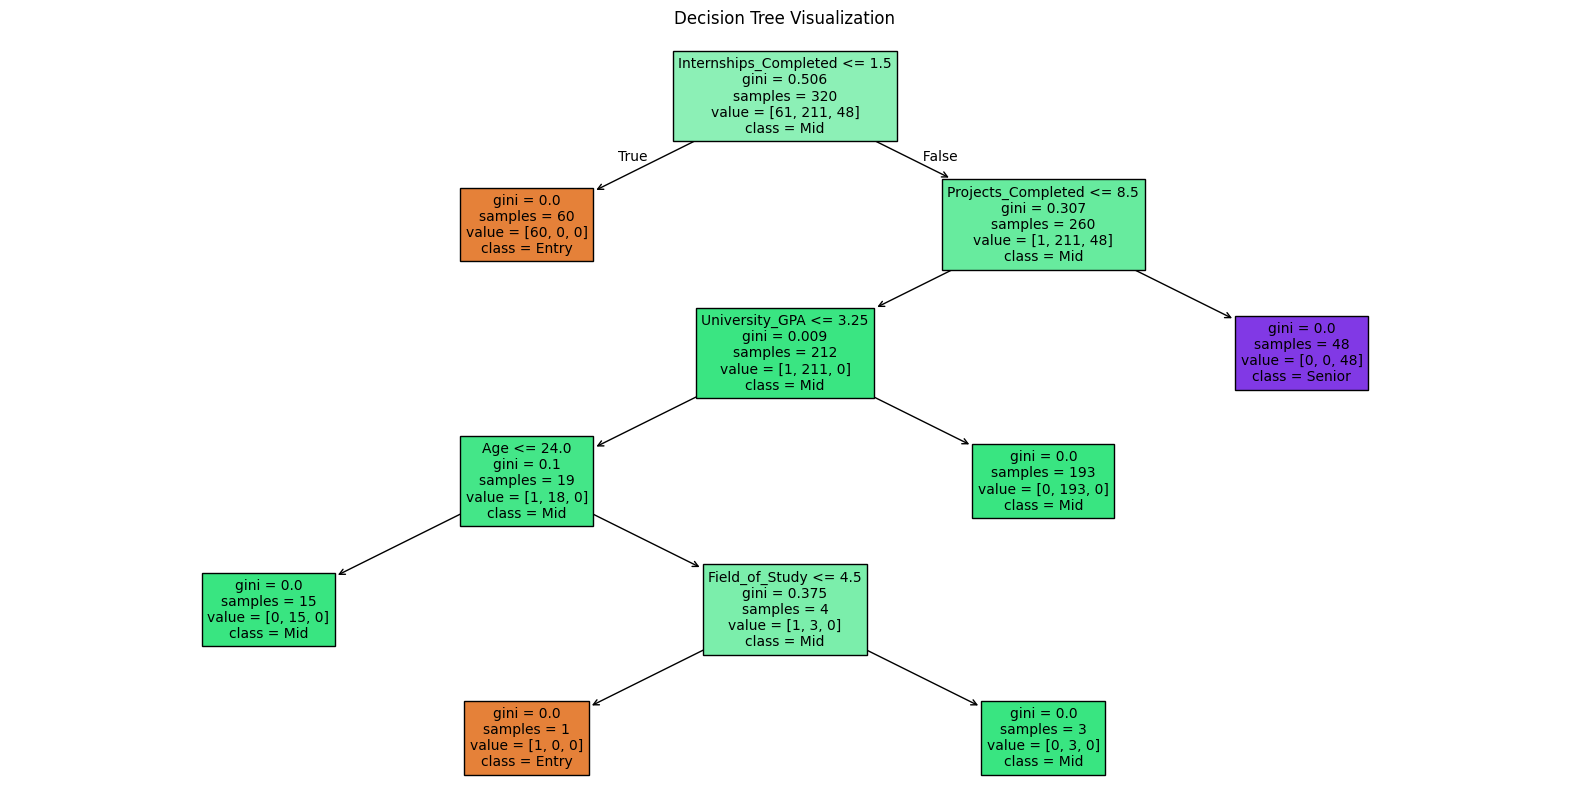

/tmp/ipython-input-1864112454.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_dt[indices_dt], y=np.array(features)[indices_dt], palette='viridis')


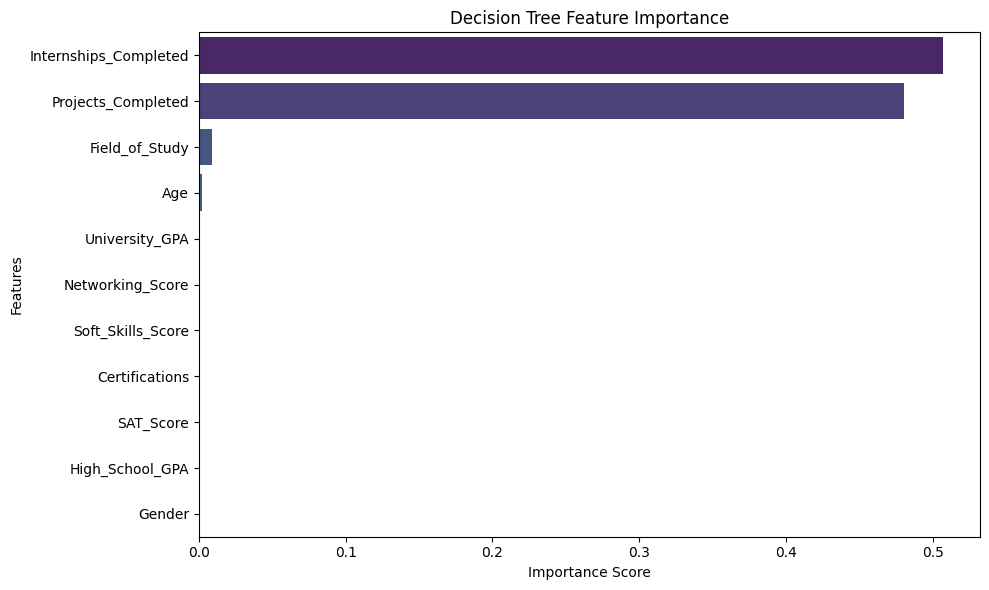

In [ ]:
# @title Decision Tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Data
df = pd.read_csv('/content/education_career_success.csv')

# 2. Setup Features and Target
target = 'Current_Job_Level'
features = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score', 'University_GPA',
            'Field_of_Study', 'Internships_Completed', 'Projects_Completed',
            'Certifications', 'Soft_Skills_Score', 'Networking_Score']

X = df[features].copy()
y = df[target]

# 3. Preprocessing
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])
le_field = LabelEncoder()
X['Field_of_Study'] = le_field.fit_transform(X['Field_of_Study'])

# 4. Split Data
# Change test_size value to try different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# 6. Evaluate
dt_pred = dt_model.predict(X_test)
print("--- Decision Tree Results ---")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.2%}")
print(classification_report(y_test, dt_pred))

# 7. Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features, class_names=dt_model.classes_, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Feature importance for Decision Tree
importances_dt = dt_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_dt[indices_dt], y=np.array(features)[indices_dt], palette='viridis')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

--- Random Forest Results ---
Accuracy: 100.00%
              precision    recall  f1-score   support

       Entry       1.00      1.00      1.00        19
         Mid       1.00      1.00      1.00        50
      Senior       1.00      1.00      1.00        11

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



/tmp/ipython-input-67252047.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='viridis')


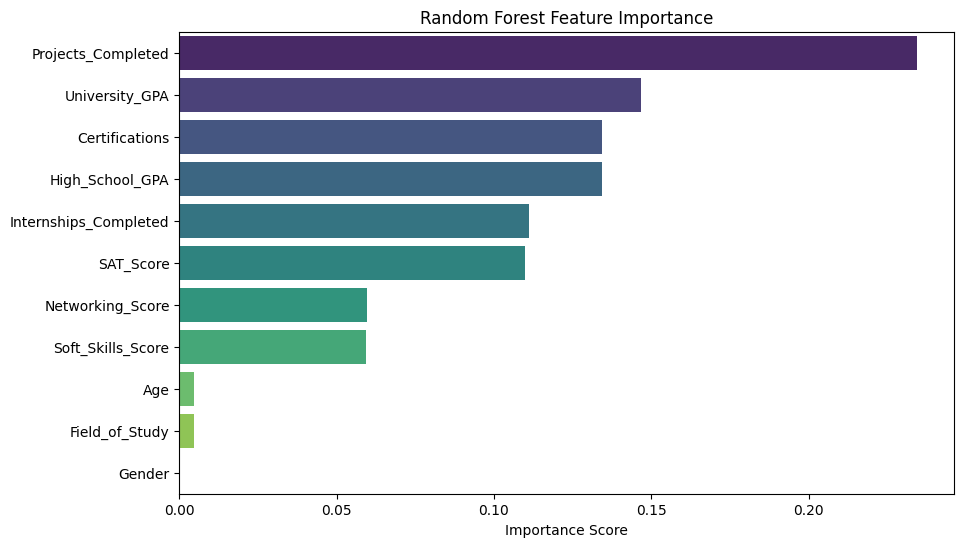

In [ ]:
# @title Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Data
df = pd.read_csv('/content/education_career_success.csv')

# 2. Setup Features and Target
target = 'Current_Job_Level'
features = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score', 'University_GPA',
            'Field_of_Study', 'Internships_Completed', 'Projects_Completed',
            'Certifications', 'Soft_Skills_Score', 'Networking_Score']

X = df[features].copy()
y = df[target]

# 3. Preprocessing
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])
le_field = LabelEncoder()
X['Field_of_Study'] = le_field.fit_transform(X['Field_of_Study'])

# 4. Split Data
# Change test_size value to try different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Evaluate
rf_pred = rf_model.predict(X_test)
print("--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.2%}")
print(classification_report(y_test, rf_pred))

# 7. Visualize Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()


=== Model Comparison Table ===
        Model  Accuracy  Precision  Recall  F1 Score
Decision Tree    0.9875   0.988542  0.9875  0.987709
Random Forest    1.0000   1.000000  1.0000  1.000000


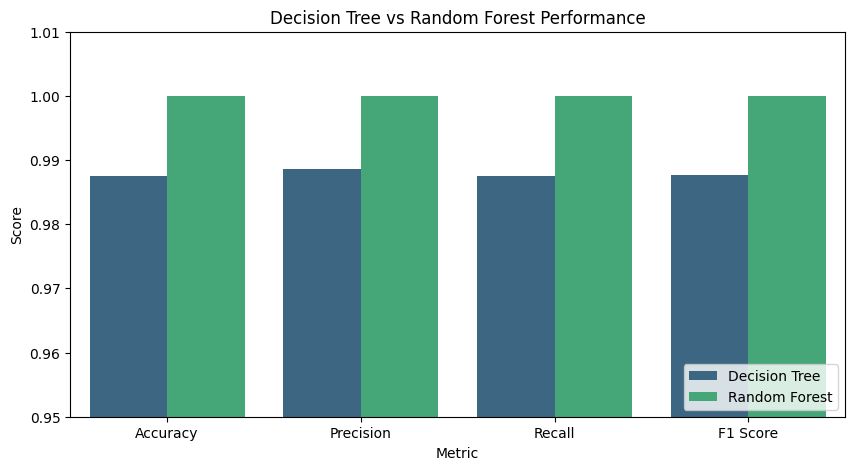

In [ ]:
# @title Model Comparison of Decision Tree & Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Load Data
df = pd.read_csv('/content/education_career_success.csv')

# 2. Setup
target = 'Current_Job_Level'
features = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score', 'University_GPA',
            'Field_of_Study', 'Internships_Completed', 'Projects_Completed',
            'Certifications', 'Soft_Skills_Score', 'Networking_Score']

X = df[features].copy()
y = df[target]

le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])
le_field = LabelEncoder()
X['Field_of_Study'] = le_field.fit_transform(X['Field_of_Study'])
# Change test_size value to try different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Both Models
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 4. Generate Comparison Table
def get_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return {'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

metrics_data = [
    get_metrics(y_test, dt_pred, 'Decision Tree'),
    get_metrics(y_test, rf_pred, 'Random Forest')
]

comparison_df = pd.DataFrame(metrics_data)

# Print Table
print("\n=== Model Comparison Table ===")
print(comparison_df.to_string(index=False))

# 5. Visualize Comparison
comparison_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 5))
sns.barplot(x="Metric", y="Score", hue="Model", data=comparison_melted, palette="viridis")
plt.title("Decision Tree vs Random Forest Performance")
plt.ylim(0.95, 1.01) # Zooming in to show small differences
plt.legend(loc='lower right')
plt.show()

In [ ]:
# @title K-fold Cross Validation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# ---------------------------------------------------------
# 1. Data Loading & Feature Engineering
# ---------------------------------------------------------
df = pd.read_csv('/content/education_career_success.csv')

# Define Target Variable
target_col = 'Current_Job_Level'

# CRITICAL: Drop outcome variables to prevent Data Leakage.
# We want to predict success based on PROFILE, not based on salary/results.
drop_cols = ['Student_ID', 'Starting_Salary', 'Job_Offers',
             'Years_to_Promotion', 'Career_Satisfaction', target_col]

X = df.drop(columns=drop_cols)
y = df[target_col]

# ---------------------------------------------------------
# 2. Preprocessing (Encoding)
# ---------------------------------------------------------
# One-Hot Encode categorical features (Gender, Field of Study, etc.)
# drop_first=True prevents multicollinearity (dummy variable trap)
X = pd.get_dummies(X, drop_first=True)

# Label Encode the Target (Ordinal: Entry -> Mid -> Senior)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ---------------------------------------------------------
# 3. Model Training (Split & Fit)
# ---------------------------------------------------------
# Split data: 80% for training the model, 20% for final evaluation
# Change test_size value to try different split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Implementation A: Decision Tree
# constrained with max_depth=5 to prevent overfitting
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Implementation B: Random Forest
# uses 100 trees (n_estimators) to ensemble the results
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# ---------------------------------------------------------
# 4. Evaluation & Validation
# ---------------------------------------------------------
# Predictions on unseen test set
dt_acc = accuracy_score(y_test, dt_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

# Validation: 5-Fold Cross Validation to prove robustness
dt_cv_scores = cross_val_score(dt_model, X, y_encoded, cv=5)
rf_cv_scores = cross_val_score(rf_model, X, y_encoded, cv=5)

print(f"--- K-Fold Cross Validation Results ---")
#print(f"Decision Tree Test Accuracy: {dt_acc:.2%}")
#print(f"Random Forest Test Accuracy: {rf_acc:.2%}")
print(f"Decision Tree 5-Fold CV Mean Accuracy: {np.mean(dt_cv_scores):.2%}")
print(f"Random Forest 5-Fold CV Mean Accuracy: {np.mean(rf_cv_scores):.2%}")


--- K-Fold Cross Validation Results ---
Decision Tree 5-Fold CV Mean Accuracy: 98.75%
Random Forest 5-Fold CV Mean Accuracy: 99.50%
